In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree 예측
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

# KNN
from sklearn.neighbors import KNeighborsRegressor

### 분류
#로지스틱 회귀분석
from statsmodels.api import Logit

# Decision tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier

#평가함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [2]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/통신고객이탈.csv", engine = "python", encoding="CP949")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [3]:
df_raw.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [4]:
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols : 
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

CHURN : 2
CUSTOMER_ID : 930
GENDER : 2
CHARGE_TYPE : 5
HANDSET : 11
USAGE_BAND : 6


In [5]:
df_raw["CHURN"] = np.where(df_raw['CHURN'] == "Churned",1,0)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [6]:
df_raw["CHURN"].sum()

180

In [27]:
df_raw = df_raw.drop("CUSTOMER_ID", axis = 1, inplace =False)

In [28]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
df_raw_x = df_raw_dummy.drop("CHURN", axis = 1, inplace =False)
df_raw_y = df_raw_dummy["CHURN"]

In [30]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (651, 33)
train data Y size : (651,)
test data X size : (279, 33)
test data Y size : (279,)


In [31]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}\n".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.988

Accuracy on test set: 0.867



In [32]:
rf_uncustomized

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [33]:
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range (1,21)]

for v_n_estimators in para_n_tree :
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy


df_accuracy_n["D"] = df_accuracy_n["TrainAccuracy"]-df_accuracy_n["TestAccuracy"]

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy,D
0,10,0.988,0.867,0.120
1,20,0.997,0.878,0.119
2,30,1.000,0.896,0.104
3,40,1.000,0.896,0.104
4,50,1.000,0.903,0.097
5,60,1.000,0.896,0.104
6,70,1.000,0.910,0.090
7,80,1.000,0.910,0.090
8,90,1.000,0.907,0.093
9,100,1.000,0.910,0.090


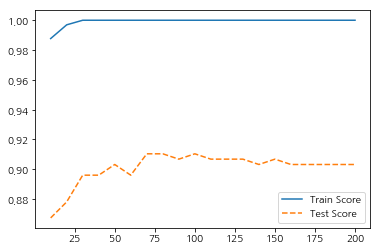

In [34]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [51]:
oob_error = []

for v_n_estimators in range(1,151):
    rf = RandomForestClassifier(n_estimators = v_n_estimators, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

Text(0.5, 0, 'n_estimators')

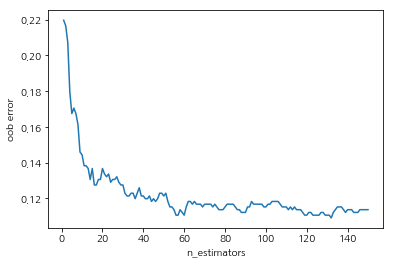

In [36]:
plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")


In [37]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range (1,31)]

for v_max_depth in para_depth :
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=70, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


df_accuracy_depth["D"] = df_accuracy_depth["TrainAccuracy"]-df_accuracy_depth["TestAccuracy"]

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,D
0,1,0.791,0.842,-0.051
1,2,0.794,0.846,-0.052
2,3,0.865,0.867,-0.003
3,4,0.879,0.871,0.008
4,5,0.892,0.889,0.004
5,6,0.912,0.910,0.002
6,7,0.939,0.907,0.032
7,8,0.945,0.903,0.041
8,9,0.949,0.903,0.046
9,10,0.957,0.903,0.054


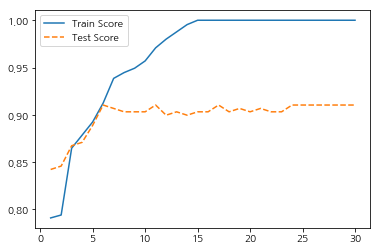

In [38]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [46]:
v_feature_name = df_train_x.columns

In [41]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf *2 for n_leaf in range (1,11)]

for v_min_samples_leaf in para_leaf :
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 6, n_estimators=70, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesleaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy


df_accuracy_leaf["D"] = df_accuracy_leaf["TrainAccuracy"]-df_accuracy_leaf["TestAccuracy"]

df_accuracy_leaf.round(3)

,MinSamplesleaf,TrainAccuracy,TestAccuracy,D
0,2,0.902,0.896,0.006
1,4,0.896,0.903,-0.008
2,6,0.896,0.900,-0.004
3,8,0.892,0.903,-0.011
4,10,0.888,0.889,-0.001
5,12,0.874,0.878,-0.004
6,14,0.860,0.875,-0.014
7,16,0.853,0.867,-0.015
8,18,0.843,0.860,-0.017
9,20,0.843,0.860,-0.017


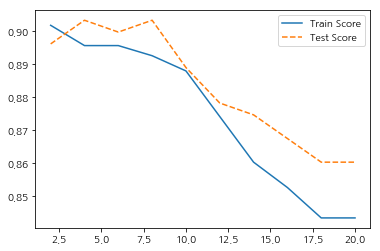

In [42]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [43]:
rf_final = RandomForestClassifier(random_state = 1234, max_depth=6, min_samples_leaf=3, n_estimators = 70)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [47]:
y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set: {0:.3f}\n".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {0:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.897

Accuracy on test set: 0.900

Confusion Matrix: 
[[229   6]
 [ 22  22]]


In [48]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.262
2,DROPPED_CALLS,0.140
4,PEAK_CALLS_TIME,0.070
8,TOTAL_CALLS_TIME,0.065
20,HANDSET_CAS30,0.063
3,PEAK_CALLS_NO,0.043
0,AGE,0.040
1,SERVICE_DURATION,0.040
7,TOTAL_CALLS_NO,0.031
25,HANDSET_SOP20,0.031


Text(0, 0.5, '변수')

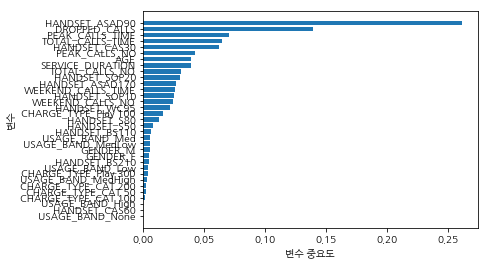

In [49]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [50]:
estimator = RandomForestClassifier()

param_grid = {"max_depth":para_depth, "min_samples_leaf":para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=18, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

best parameter: 
{'max_depth': 18, 'min_samples_leaf': 4}

best score:
0.882


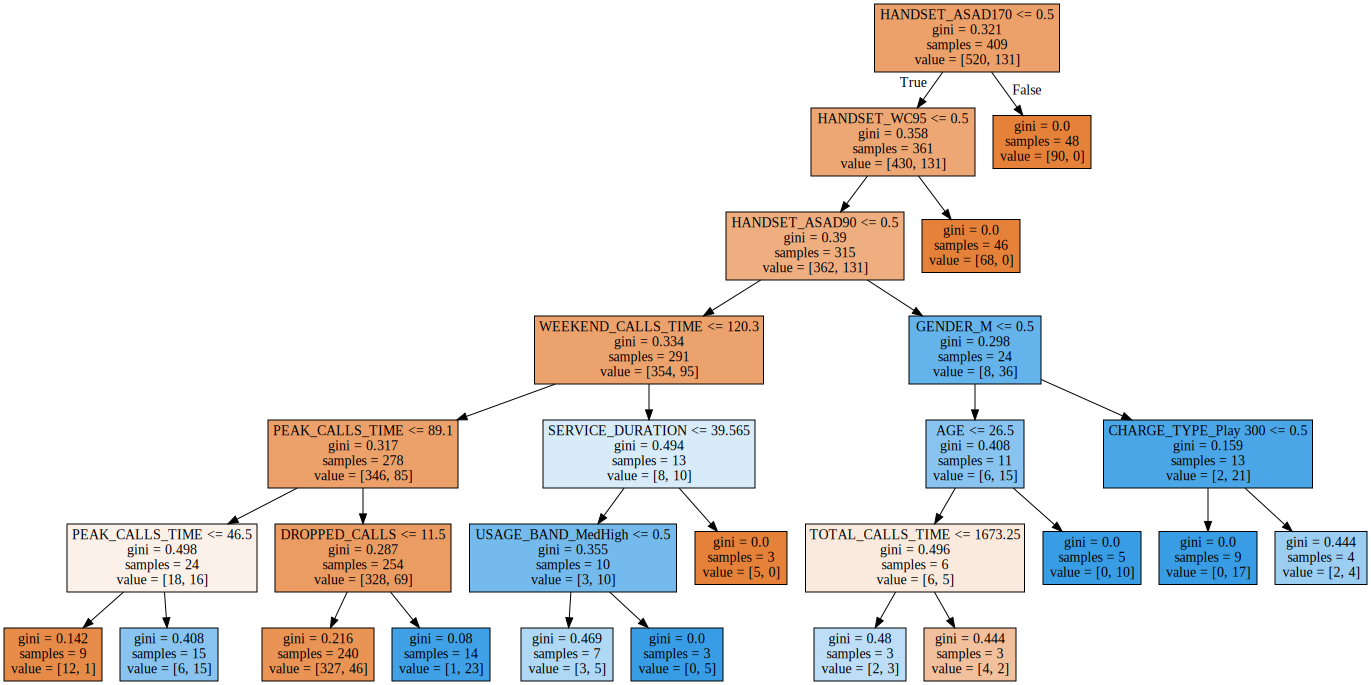

In [53]:
export_graphviz(rf_final.estimators_[9], out_file="rfr_final_0.dot", feature_names=v_feature_name, impurity = True, filled = True)
with open("rfr_final_0.dot") as f :
    dot_graph = f.read()

display(graphviz.Source(dot_graph))